<a href="https://colab.research.google.com/github/mariahirit/Classification-of-volcanic-eruptions/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Introduction and data cleaning

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

Next we will try to predict the type of volcanic eruption. To do this, we have 6 different features based on numeric values. Each of these features represents a sensor. To perform the prediction, we need to use Random Forest, which is a tree-based algorithm that operates random bootstrap sampling to make its predictions.

In [45]:
data = pd.read_csv("jm_train.csv")
data.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0
5,-0.318657,1.494771,1.016929,-0.406147,1.404118,-0.079592,2
6,-0.446664,-1.756617,-3.667949,-4.190566,-1.791285,-3.612232,1
7,-1.029892,2.621811,-1.323657,-1.355265,0.075202,-2.446302,0
8,1.493962,0.308105,-0.496445,-1.412684,0.210068,-0.607648,4
9,-0.226935,2.793953,-2.351688,2.074944,-2.227525,-1.475209,0


In [46]:
print("Verificamos tipos de datos: ")
data.dtypes

Verificamos tipos de datos: 


feature1    float64
feature2    float64
feature3    float64
feature4    float64
feature5    float64
feature6    float64
target        int64
dtype: object

In [47]:
data.shape

(2100, 7)

In [48]:
print("Proporcion de valores nulos: ")
data.isnull().sum() / data.shape[0]

Proporcion de valores nulos: 


feature1    0.0
feature2    0.0
feature3    0.0
feature4    0.0
feature5    0.0
feature6    0.0
target      0.0
dtype: float64

In [49]:
data.tail()

,feature1,feature2,feature3,feature4,feature5,feature6,target
2095,-0.947002,0.174969,-0.180249,0.118236,-0.143420,-0.359509,0
2096,-1.224148,0.029956,0.536684,0.888406,0.119460,0.378946,1
2097,-0.847593,1.538574,0.962409,1.966467,0.379934,0.737907,3
2098,1.472437,1.187695,1.015766,-1.103522,1.586722,0.182569,4
2099,-0.083489,-1.194784,-0.389204,-2.369081,0.382413,-0.900237,3


#2.Exploratory Data

In [50]:
data["target"].value_counts()

0    427
3    426
1    423
2    419
4    405
Name: target, dtype: int64

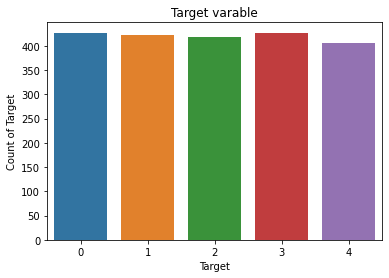

In [51]:
sns.countplot(data["target"])
plt.xlabel("Target")
plt.ylabel("Count of Target")
plt.title("Target varable")
plt.show()

In [52]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


In [53]:
data.isnull().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
target      0
dtype: int64

It also seems that there is similarity and symmetry between the both sides, this mean the dataset is clean and has a well-distributed data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14fd072e10>,
      dtype=object)

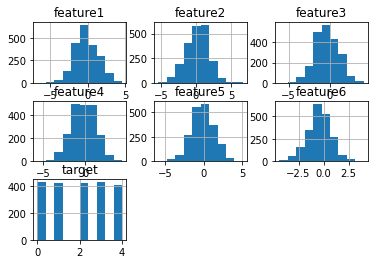

In [54]:
data.hist()

In [55]:
x= data.iloc[:, :-1]
y = data.iloc[:, -1]

In [56]:
x.shape


(2100, 6)

In [57]:
y.shape

(2100,)

#3.Model building

We will develop our model using the features_importance.

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=99)

In [59]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(criterion="entropy",
                           max_depth= 8,
                           min_samples_split=10,
                           random_state=5)

In [60]:
cls.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=5)

In [61]:
cls.feature_importances_

array([0.25099874, 0.21298662, 0.11270241, 0.15888817, 0.13068303,
       0.13374102])

In [62]:
data.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'target'],
      dtype='object')

In [63]:
y_pred = cls.predict(x_train)
y_pred[0: ]

array([3, 1, 1, ..., 1, 2, 2])

# 4.Model evaluation

# 4.1 Train datasets

In [64]:

from sklearn.metrics import confusion_matrix
confusion_matrix( y_train, y_pred)

array([[288,  15,   7,   9,   0],
       [  7, 278,  12,  19,   1],
       [  8,   7, 269,   9,  19],
       [  5,   9,   5, 280,  21],
       [  9,   0,   7,  10, 281]])

In [65]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average='macro')

0.8863878411443127

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.8863492063492063

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score(cls, x_train, y_train, cv =10)

array([0.71518987, 0.8164557 , 0.74050633, 0.78481013, 0.78481013,
       0.72611465, 0.74522293, 0.75159236, 0.77070064, 0.70700637])

In [68]:
from sklearn.metrics import classification_report
print(classification_report (y_pred, y_train))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       317
           1       0.88      0.90      0.89       309
           2       0.86      0.90      0.88       300
           3       0.88      0.86      0.87       327
           4       0.92      0.87      0.89       322

    accuracy                           0.89      1575
   macro avg       0.89      0.89      0.89      1575
weighted avg       0.89      0.89      0.89      1575



#Exploratory DataTest

In [69]:
datatest= pd.read_csv("jm_X_test.csv")
datatest.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644
5,-1.259524,-0.298085,2.043900,-0.945770,2.108906,0.622710
6,1.433834,1.991280,0.537571,1.260210,0.371860,0.633029
7,-1.048317,-0.238468,-1.722257,-1.381502,-0.931728,-1.843310
8,3.179688,-0.132839,1.015864,0.285619,0.654270,1.610692
9,2.355756,-1.503617,-1.531898,-1.944593,-0.901331,-0.698797


In [70]:
print("Verificamos tipos de datos: ")
datatest.dtypes

Verificamos tipos de datos: 


feature1    float64
feature2    float64
feature3    float64
feature4    float64
feature5    float64
feature6    float64
dtype: object

In [71]:
datatest.shape

(900, 6)

In [72]:
print("Proporcion de valores nulos: ")
datatest.isnull().sum() / datatest.shape[0]

Proporcion de valores nulos: 


feature1    0.0
feature2    0.0
feature3    0.0
feature4    0.0
feature5    0.0
feature6    0.0
dtype: float64

In [73]:
datatest.describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.170339,0.135481,-0.447035,-0.201708,-0.263349,-0.445490
std,1.485402,1.547202,1.394437,1.487102,1.450823,1.215000
min,-5.084203,-4.292548,-4.628992,-6.732089,-5.196997,-4.823971
25%,-1.098759,-0.934171,-1.460497,-1.163163,-1.182667,-1.152891
50%,-0.386297,0.341427,-0.464239,-0.177710,-0.233699,-0.410182
75%,0.881170,1.246296,0.626893,0.870332,0.679282,0.399597
max,4.636012,4.612113,3.299946,5.996929,3.917118,5.357953


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14fcc52e50>,
      dtype=object)

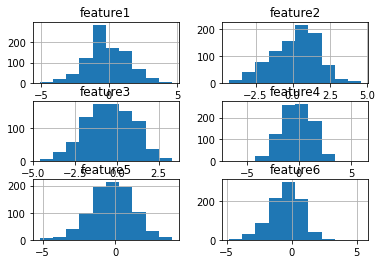

In [74]:
datatest.hist()

In [75]:
x= datatest.iloc[0:]


In [76]:
x.shape

(900, 6)

#3.Model building with Data Test

In [77]:
y_pred = cls.predict(x_test)
y_pred[0: ]

array([1, 1, 1, 4, 3, 1, 1, 0, 4, 1, 4, 3, 2, 3, 3, 3, 4, 4, 1, 3, 2, 4,
       0, 4, 0, 2, 3, 1, 3, 4, 0, 0, 3, 4, 3, 4, 4, 0, 4, 3, 3, 2, 2, 3,
       2, 4, 0, 4, 0, 0, 3, 1, 1, 3, 3, 3, 1, 4, 2, 4, 1, 1, 4, 1, 1, 4,
       3, 2, 0, 4, 2, 3, 4, 3, 1, 4, 3, 2, 0, 4, 4, 1, 1, 1, 3, 3, 2, 0,
       2, 0, 0, 1, 3, 4, 4, 2, 0, 3, 4, 1, 1, 2, 4, 4, 4, 2, 0, 0, 2, 0,
       4, 2, 3, 1, 0, 3, 3, 0, 2, 4, 1, 3, 3, 4, 0, 0, 4, 4, 1, 2, 0, 1,
       0, 2, 1, 0, 2, 4, 2, 0, 3, 1, 4, 1, 4, 4, 4, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 3, 1, 2, 2, 2, 2, 2, 0, 3, 1, 4, 3, 1, 3, 1, 0, 2, 0, 4, 1,
       3, 2, 3, 2, 1, 2, 0, 0, 1, 1, 3, 2, 4, 3, 2, 3, 0, 1, 4, 0, 1, 3,
       4, 2, 4, 4, 1, 0, 1, 1, 4, 2, 3, 4, 2, 3, 2, 1, 3, 1, 2, 1, 1, 4,
       4, 2, 1, 4, 1, 1, 1, 1, 1, 2, 4, 0, 3, 2, 0, 4, 3, 2, 1, 4, 0, 3,
       1, 2, 0, 0, 1, 3, 2, 2, 4, 2, 1, 3, 1, 0, 2, 0, 0, 1, 4, 4, 2, 0,
       1, 2, 1, 2, 0, 4, 2, 2, 3, 2, 3, 4, 1, 3, 0, 4, 4, 2, 0, 1, 0, 4,
       0, 0, 3, 0, 1, 3, 1, 1, 1, 4, 4, 2, 4, 1, 2,

# 4.1 Test datasets

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y_test, y_pred)

array([[88, 10,  5,  4,  1],
       [ 6, 82, 11,  6,  1],
       [ 9, 15, 66,  5, 12],
       [ 0, 10,  4, 84,  8],
       [ 0,  1,  7,  9, 81]])

In [79]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.7634565916234733

In [80]:
from sklearn.model_selection import cross_val_score
cross_val_score(cls, x_train, y_train, cv =10)

array([0.71518987, 0.8164557 , 0.74050633, 0.78481013, 0.78481013,
       0.72611465, 0.74522293, 0.75159236, 0.77070064, 0.70700637])

In [81]:
from sklearn.metrics import classification_report
print(classification_report (y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       103
           1       0.77      0.69      0.73       118
           2       0.62      0.71      0.66        93
           3       0.79      0.78      0.79       108
           4       0.83      0.79      0.81       103

    accuracy                           0.76       525
   macro avg       0.76      0.76      0.76       525
weighted avg       0.77      0.76      0.76       525



Text(0.5, 1.0, 'Confusion Matrix')

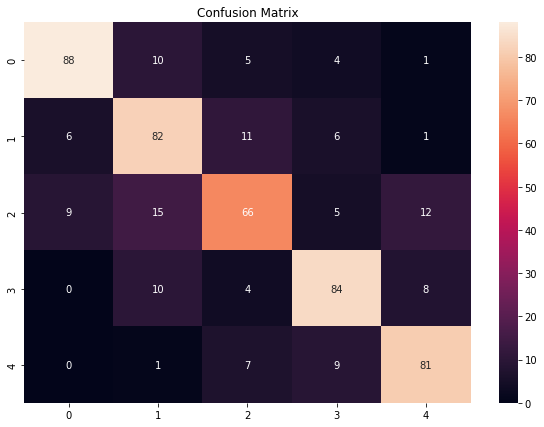

In [82]:
df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in "01234"],
                  columns = [i for i in "01234"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix")

#5.Output

In [83]:
def download_output(y_pred, name):
  output = pd.DataFrame({ 
                         'Finally predict': y_pred})
  output.to_csv(name, index=False)

download_output(y_pred, 'vulcan_predict.csv')